In [1]:
%matplotlib inline
from TMDataset import TMDataset
dataset = TMDataset()
dataset.create_balanced_dataset()
#detection = TMDetection()
dataframe = dataset.get_dataset
print(dataframe.columns.values)
reduced_dataframe = dataframe[[
        'android.sensor.gyroscope_uncalibrated#mean',
        'android.sensor.gyroscope#mean',
    ]]
dataframe['target'].value_counts()

START CREATE BALANCED DATASET....
END CREATE BALANCED DATASET....
['time' 'activityrecognition#0' 'activityrecognition#1'
 'android.sensor.accelerometer#mean' 'android.sensor.accelerometer#min'
 'android.sensor.accelerometer#max' 'android.sensor.accelerometer#std'
 'android.sensor.gravity#mean' 'android.sensor.gravity#min'
 'android.sensor.gravity#max' 'android.sensor.gravity#std'
 'android.sensor.linear_acceleration#mean'
 'android.sensor.linear_acceleration#min'
 'android.sensor.linear_acceleration#max'
 'android.sensor.linear_acceleration#std'
 'android.sensor.orientation#mean' 'android.sensor.orientation#min'
 'android.sensor.orientation#max' 'android.sensor.orientation#std'
 'android.sensor.gyroscope_uncalibrated#mean'
 'android.sensor.gyroscope_uncalibrated#min'
 'android.sensor.gyroscope_uncalibrated#max'
 'android.sensor.gyroscope_uncalibrated#std'
 'android.sensor.magnetic_field_uncalibrated#mean'
 'android.sensor.magnetic_field_uncalibrated#min'
 'android.sensor.magnetic_fiel

Car        1314
Bus        1313
Train      1312
Still      1311
Walking    1311
Name: target, dtype: int64

       android.sensor.gyroscope#mean  android.sensor.gyroscope#mean
count                    5740.000000                    5740.000000
mean                        0.329170                       0.329170
std                         0.578890                       0.578890
min                         0.000000                       0.000000
25%                         0.017290                       0.017290
50%                         0.059505                       0.059505
75%                         0.270155                       0.270155
max                         4.679125                       4.679125


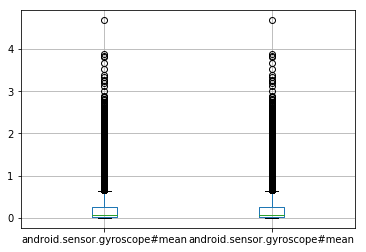

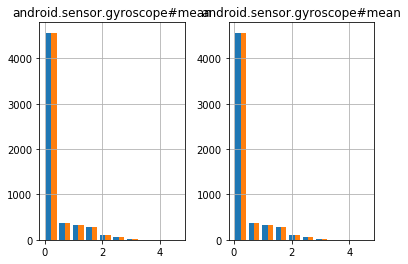

In [2]:
# Summary Statistics
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

# descriptive stats
print(reduced_dataframe.describe())
# box and whisker plot
reduced_dataframe.boxplot()
pyplot.show()
# histogram
reduced_dataframe.hist()
pyplot.show()

In [3]:
# Normality Test
from pandas import read_csv
from scipy.stats import normaltest
from matplotlib import pyplot
value, p = normaltest(reduced_dataframe.values[:,0])
print(value, p)
if p >= 0.05:
    print('It is likely that reduced_dataframe is normal')
else:
    print('It is unlikely that reduced_dataframe is normal')


(nan, nan)
It is unlikely that reduced_dataframe is normal


In [4]:
#Compare Means for Gaussian Result
from pandas import read_csv
from scipy.stats import ttest_ind
from matplotlib import pyplot
# calculate the significance
value, pvalue = ttest_ind(
    reduced_dataframe['android.sensor.gyroscope_uncalibrated#mean'], 
    reduced_dataframe['android.sensor.gyroscope#mean'], 
    equal_var=True
)
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (accept H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

(array([nan, nan]), array([nan, nan]))


/home/eltonfss/anaconda3/envs/us_transportation/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/eltonfss/anaconda3/envs/us_transportation/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/eltonfss/anaconda3/envs/us_transportation/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/eltonfss/anaconda3/envs/us_transportation/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
#Compare Means for Gaussian Results with Different Variance
from numpy.random import seed
from numpy.random import normal
from scipy.stats import ttest_ind

values1 = reduced_dataframe['android.sensor.gyroscope_uncalibrated#mean']
values2 = reduced_dataframe['android.sensor.gyroscope#mean']
# calculate the significance
value, pvalue = ttest_ind(values1, values2, equal_var=False)
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (accept H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

(array([nan, nan]), array([nan, nan]))


/home/eltonfss/anaconda3/envs/us_transportation/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#Compare Means for Non-Gaussian Results
from numpy.random import seed
from numpy.random import randint
from scipy.stats import ks_2samp

values1 = reduced_dataframe['android.sensor.gyroscope_uncalibrated#mean']
values2 = reduced_dataframe['android.sensor.gyroscope#mean']
# calculate the significance
value, pvalue = ks_2samp(values1, values2)
print(value, pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (accept H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')